In [26]:
#Copyright 2018, JinYoung Kim Softcomputing LAB all rights reserved.
%matplotlib inline
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

In [37]:
class kmeans():
    def __init__(self, n_cluster = 10, max_iter = 100):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.centers = None
    # initializing centers randomly
    def initial_center(self, pts):
        idx = np.random.choice(pts.shape[0], self.n_cluster)
        centers = np.zeros((self.n_cluster, pts.shape[1]))
        for i in range(self.n_cluster):
            centers[i] = pts[idx[i]]
        return centers
    # update centers based on input points
    def update_center(self, pts):
        return np.squeeze(np.mean(pts, axis=0))
    # return label by calculating distances between given input and centers for each
    def return_label(self, pt, centers):
        a = np.reshape(np.tile(pt, self.n_cluster), [self.n_cluster, -1])
        return np.argmin(np.sqrt(np.sum((a - centers)**2, axis=-1)), axis=0)
    # train k-means clustering model
    def train(self, pts, retrain = False):
        if not retrain:
            self.centers = self.initial_center(pts)
        labels = np.zeros((pts.shape[0],))
        for i in range(pts.shape[0]):
            labels[i] = self.return_label(pts[i], self.centers)
        for i in range(self.max_iter):
            for j in range(self.n_cluster):
                self.centers[j] = self.update_center(pts[labels==j])
            for j in range(pts.shape[0]):
                labels[j] = self.return_label(pts[j], self.centers)
            if (i+1)%10==0:
                print(i+1)
    # return centers
    def get_center(self):
        return self.centers
    # predict 
    def predict(self, pt):
        a = np.reshape(np.tile(pt, self.n_cluster), [self.n_cluster, -1])
        return np.argmin(np.sqrt(np.sum((a - self.centers)**2, axis=-1)), axis=0)

In [34]:
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

X_train = np.reshape(X_train, [-1, 28*28])
X_test = np.reshape(X_test, [-1, 28*28])

In [50]:
km = kmeans(max_iter=10)

In [51]:
km.train(X_train)

10


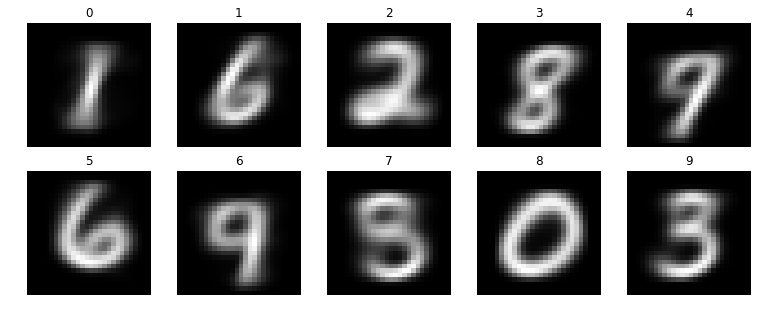

In [52]:
# plot centers
plt.figure(figsize=(13,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(km.get_center()[i], (28,28)), cmap = 'gray')
    plt.title(km.predict(km.get_center()[i]))
    plt.axis('off')
plt.show()

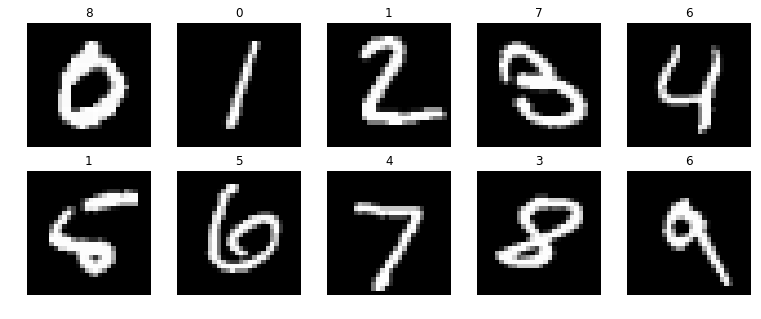

In [53]:
# plot predicted label as title
plt.figure(figsize=(13,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(X_test[Y_test==i][0], (28,28)), cmap = 'gray')
    plt.title(km.predict(X_test[Y_test==i][0]))
    plt.axis('off')
plt.show()